# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [ ]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Agregue aqui el resto de las librerias que necesite
# from ...
# import ...

## Lectura de Datos

In [ ]:
# Permiso para acceder a drive desde colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Se agrega la carpeta de trabajo
dataPath = "/content/drive/My Drive/Colab Notebooks/IntroCD_T1"

In [ ]:
# DataFrame con todos los discursos:
df_speeches = pd.read_csv(dataPath + '/data/us_2020_election_speeches.csv')
df_speeches

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\nThank you. What a ni...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\nHey, and welco...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\nIt’s nothing but no...,"Oct 15, 2020",NBC,Town Hall
...,...,...,...,...,...,...
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\nJust want to take thi...,"Feb 6, 2020",Iowa,Campaign Speech
265,Democratic Candidates,Transcript: Speeches at the Iowa Caucuses – Be...,Bernie Sanders: (00:08)\nThank you. Thank you....,"Feb 4, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\nI worked so hard for th...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech
267,Donald Trump,Donald Trump New Jersey Rally Speech Transcrip...,Donald Trump: (01:22)\nThank you. Thank you. I...,"Jan 28, 2020","Wildwood, New Jersey",Campaign Speech


# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [ ]:
# TODO: Analice la cantidad de discursos por candidato

# Tome los 5 candidatos con más discursos
# df_speeches_top_5 = ...

In [ ]:
# Contar cuántas respuestas hay por presidente
conteo = df_speeches['speaker'].value_counts()

# Mostrar el top 5
top_5 = conteo.head(5)

print(top_5)

speaker
Joe Biden         71
Donald Trump      53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64


In [ ]:
# Nombres de los 5 presidentes con más discursos
top_5_speaker = conteo.head(5).index.tolist()

# Filtrado del DataFrame original
df_speeches_top_5 = df_speeches[df_speeches['speaker'].isin(top_5_speaker)]

# Verificación de resultados
print(df_speeches_top_5['speaker'].value_counts())


speaker
Joe Biden         71
Donald Trump      53
Mike Pence        19
Bernie Sanders    16
Kamala Harris     11
Name: count, dtype: int64


In [ ]:
# CONTROL cambio de tamaño del df
print(df_speeches.size)
print(df_speeches_top_5.size)

1614
1020


In [ ]:
# COMENTARIO
# Hay filas con múltiples speakers
# Lista solo de nombres de presidentes del df original
lista_presidentes = conteo.index.tolist()
print(lista_presidentes)
print(len(lista_presidentes))

['Joe Biden', 'Donald Trump', 'Mike Pence', 'Bernie Sanders', 'Kamala Harris', 'Democratic Candidates', 'Multiple Speakers', 'Elizabeth Warren', 'Pete Buttigieg', 'Joe Biden,Kamala Harris', 'Barack Obama', 'Andrew Yang', 'Mike Bloomberg', 'Lindsey Graham, Jaime Harrison', 'Michelle Obama', 'Cindy McCain', 'Jill Biden', 'Kamala Harris, Mike Pence', 'David Perdue', 'Donald Trump, Joe Biden', 'Ivanka Trump', 'Tom Cotton', 'Rudy Giuliani', 'Lou Holtz', 'Karen Pence', 'Jack Brewer', 'Kellyanne Conway', 'Kayleigh McEnany', 'Dan Crenshaw', 'Pam Bondi', 'Melania Trump', 'Mike Pompeo', 'Eric Trump', 'Nicholas Sandmann', 'Tiffany Trump', 'Ben Carson', 'Mitch McConnell', 'Chen Guangcheng', 'Lara Trump', 'Herschel Walker', 'Kimberly Guilfoyle', 'Tim Scott', 'Rand Paul', 'Michael Bloomberg', 'Sarah Cooper', 'Jim Jordan', 'Donald Trump Jr.', 'Gavin Newsom', 'Hillary Clinton', 'Nancy Pelosi', 'Colin Powell', 'Alexandria Ocasio-Cortez', 'Bill Clinton', 'Cory Booker', 'Nikki Haley', 'John Kasich', 'Chu

In [1]:
#control - ejemplo
df_speeches[df_speeches['speaker'] == 'Donald Trump, Joe Biden']

NameError: name 'df_speeches' is not defined

## Visualizaciones

In [ ]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo


In [ ]:
# CONVERTIR LA COLUMNA A FORMATO FECHA
df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])

<ipython-input-27-7771df14bf5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])


In [ ]:
# Verificación
df_speeches_top_5.head(2)

,speaker,title,text,date,location,type
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...",2020-10-16,"Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\nThank you. What a ni...,2020-10-16,"Fort Myers, Florida",Campaign Speech


<ipython-input-36-7220590c2a95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['year'] = df_speeches_top_5['date'].dt.year  # O .dt.to_period('M') para año+mes


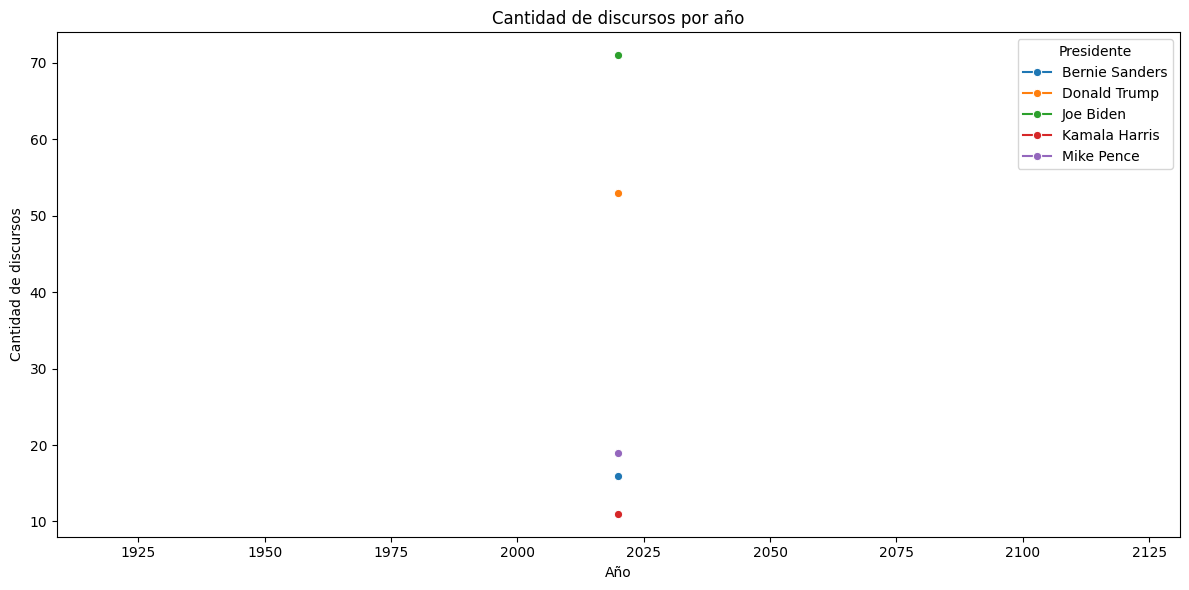

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna que solo tenga el año, mes o fecha completa (según qué tan detallado quieras)
df_speeches_top_5['year'] = df_speeches_top_5['date'].dt.year  # O .dt.to_period('M') para año+mes

# Contar discursos por año y presidente
df_timeline = df_speeches_top_5.groupby(['year', 'speaker']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_timeline, x='year', y='count', hue='speaker', marker='o')

plt.title('Cantidad de discursos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de discursos')
plt.legend(title='Presidente')
plt.tight_layout()
plt.show()

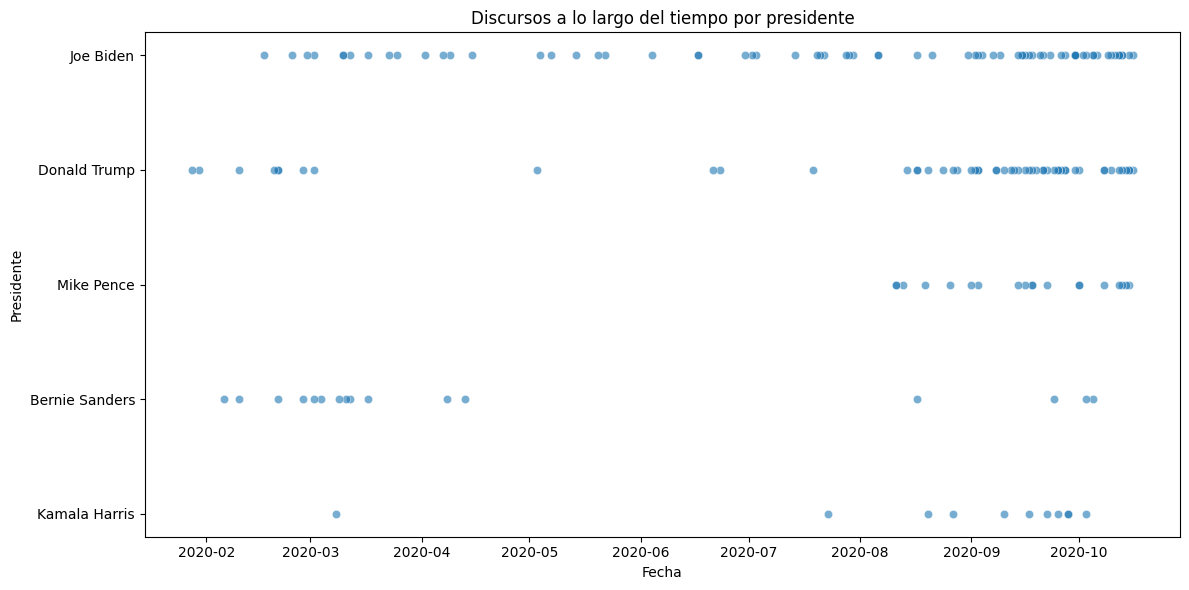

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_speeches_top_5, x='date', y='speaker', alpha=0.6)

plt.title('Discursos a lo largo del tiempo por presidente')
plt.xlabel('Fecha')
plt.ylabel('Presidente')
plt.tight_layout()
plt.show()


In [ ]:
# Crear una columna con el mes (año y mes, para mantener orden)
df_speeches_top_5['month'] = df_speeches_top_5['date'].dt.to_period('M')

# Agrupar por mes y presidente
df_mes = df_speeches_top_5.groupby(['month', 'speaker']).size().reset_index(name='count')

# Convertir de nuevo a datetime para plotear correctamente en el eje X
df_mes['month'] = df_mes['month'].dt.to_timestamp()

<ipython-input-37-a96fcba5f42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5['month'] = df_speeches_top_5['date'].dt.to_period('M')


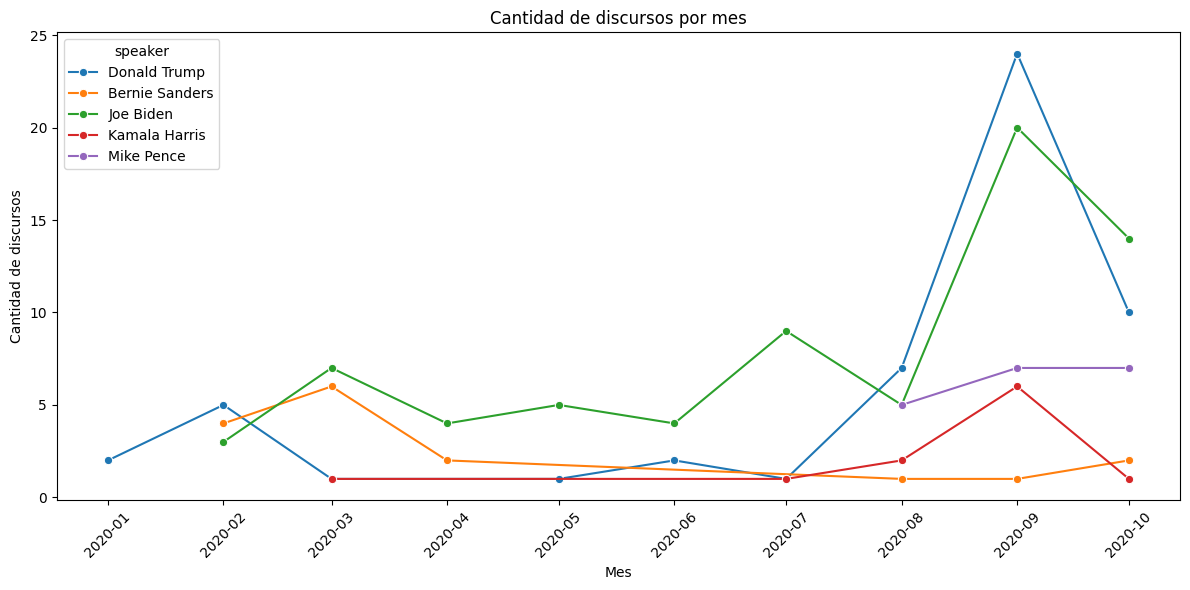

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_mes, x='month', y='count', hue='speaker', marker='o')

plt.title('Cantidad de discursos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de discursos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Limpieza de Texto y Conteo de Palabras

In [ ]:
df_speeches_top_5.head(1)

,speaker,title,text,date,location,type,year,month
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...",2020-10-16,"Southfield ,Michigan",Campaign Speech,2020,2020-10


In [ ]:
def clean_text(df, column_name):

    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)

    # Convertir todo a minúsculas
    result = result.str.lower()

    # TODO: completar signos de puntuación faltantes
    for punc in ["[", "\n", ",", ":", "?"]:
        result = result.str.replace(punc, " ")

    return result

# TODO: Creamos una nueva columna CleanText a partir de text
df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5, 'text')

<ipython-input-42-89c8dd3060a3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5, 'text')


In [ ]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_speeches_top_5[["CleanText", "WordList"]]

<ipython-input-43-d8020bc0ff19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()


,CleanText,WordList
1,hello michigan. hi how are you what’s your ...,"[hello, michigan., hi, how, are, you, what’s, ..."
2,thank you. what a nice group. thank you very m...,"[thank, you., what, a, nice, group., thank, yo..."
3,hey and welcome to our town hall with joe bid...,"[hey, and, welcome, to, our, town, hall, with,..."
4,it’s nothing but noise. what okay. all right ...,"[it’s, nothing, but, noise., what, okay., all,..."
5,thank you very much. thank you. let’s see it’...,"[thank, you, very, much., thank, you., let’s, ..."
...,...,...
257,hello manchester and i am thrilled to be in ...,"[hello, manchester, and, i, am, thrilled, to, ..."
260,thank you. thank you all for coming out. let m...,"[thank, you., thank, you, all, for, coming, ou..."
264,just want to take this opportunity to thank al...,"[just, want, to, take, this, opportunity, to, ..."
266,i worked so hard for this state. i worked so h...,"[i, worked, so, hard, for, this, state., i, wo..."


# Parte 2: Conteo de Palabras y Visualizaciones

 ## Candidatos con mayor cantidad de palabras

In [ ]:
# TODO: Realice una visualización que permita comparar las palabras más frecuentes de cada uno de los cinco candidatos/as.
# - Encuentra algún problema en los resultados?


In [ ]:
from collections import Counter
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Agrupar todas las listas de palabras por candidato
listas_por_speaker = df_speeches_top_5.groupby('speaker')['WordList'].sum()

# Contar las palabras por speaker
top_palabras_por_speaker = {}

for speaker, lista_palabras in listas_por_speaker.items():
    conteo = Counter(lista_palabras)
    top_10 = conteo.most_common(10)

    df_temp = pd.DataFrame(top_10, columns=['palabra', 'frecuencia'])
    df_temp['speaker'] = speaker
    top_palabras_por_speaker[speaker] = df_temp

# Unir los DataFrames en uno solo
df_top_palabras = pd.concat(top_palabras_por_speaker.values(), ignore_index=True)


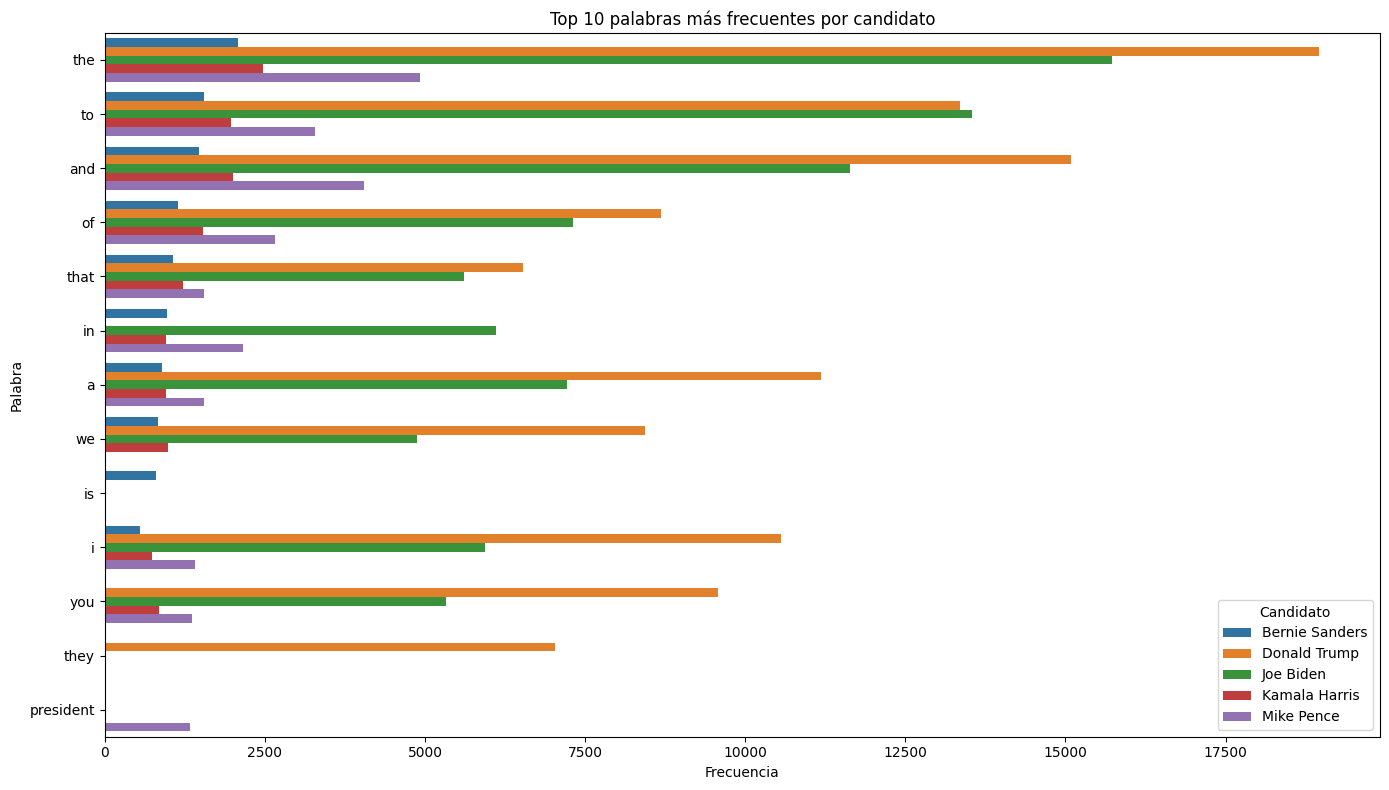

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_top_palabras, x='frecuencia', y='palabra', hue='speaker')

plt.title('Top 10 palabras más frecuentes por candidato')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.legend(title='Candidato')
plt.tight_layout()
plt.show()


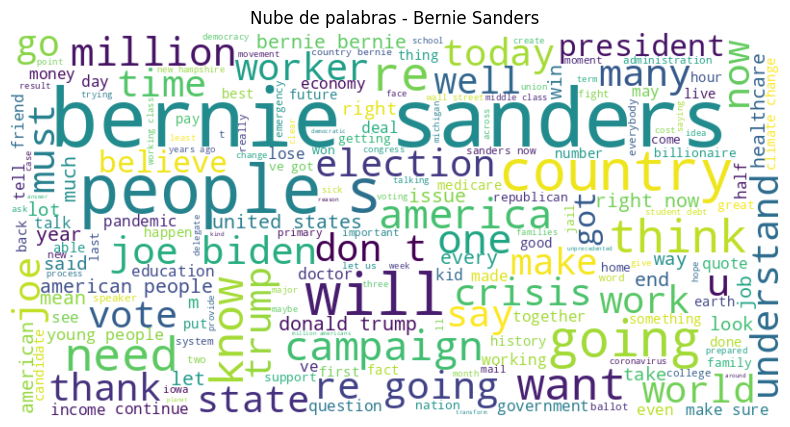

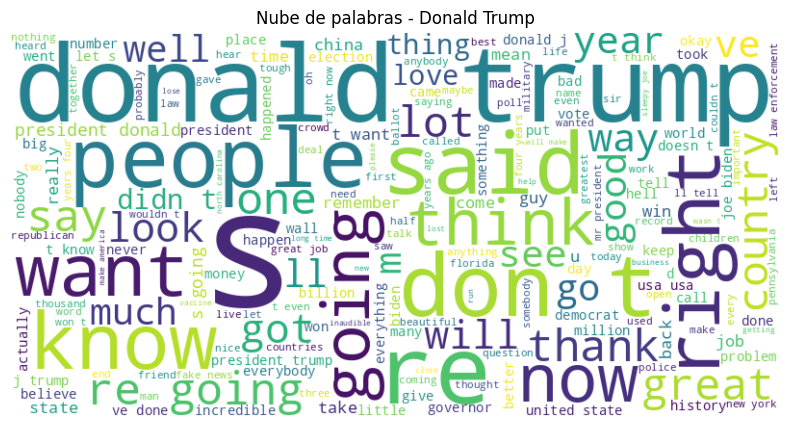

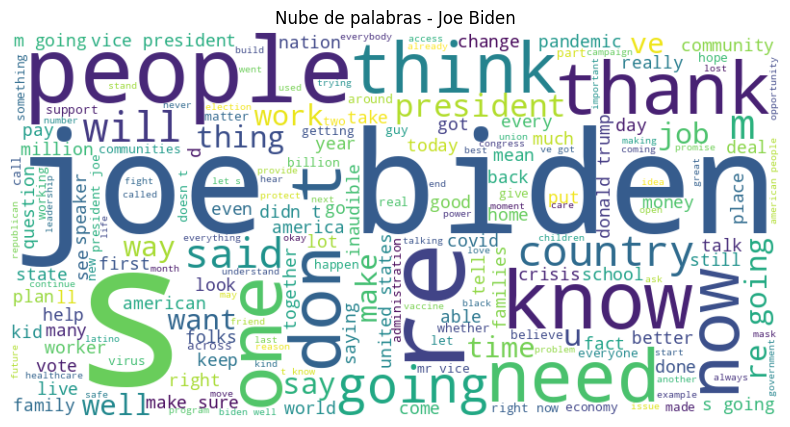

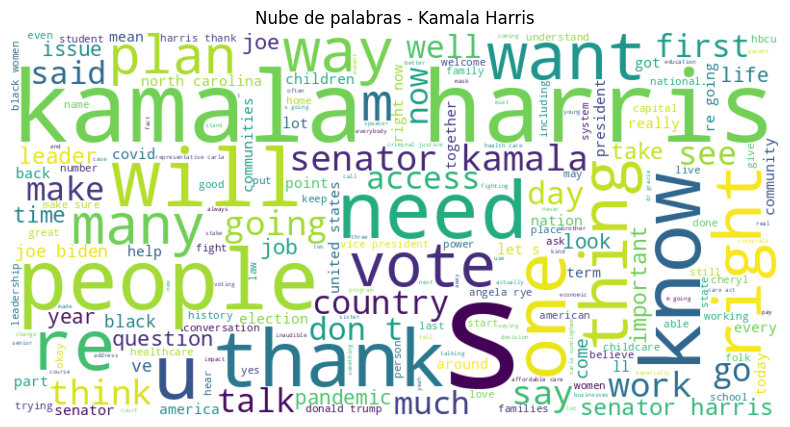

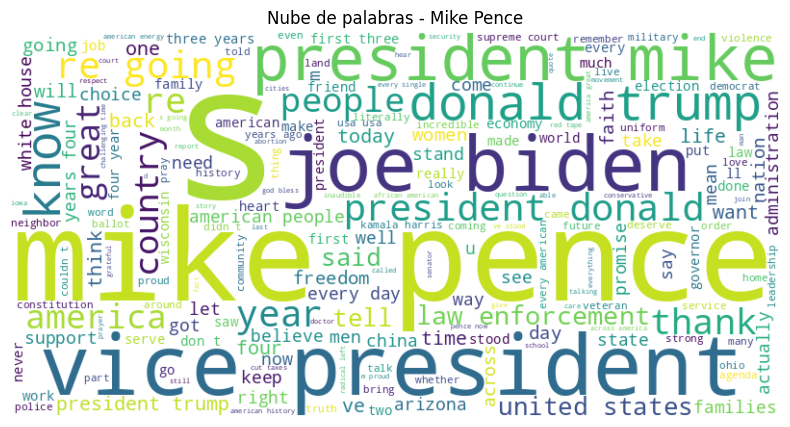

In [ ]:
# NUBE DE PALABRAS POR CANDIDATO (Visual y fácil de interpretar)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Agrupar las palabras en una sola string por candidato
for speaker, lista_palabras in listas_por_speaker.items():
    texto = ' '.join(lista_palabras)

    wc = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras - {speaker}')
    plt.show()


ValueError: Unknown format code 'd' for object of type 'float'

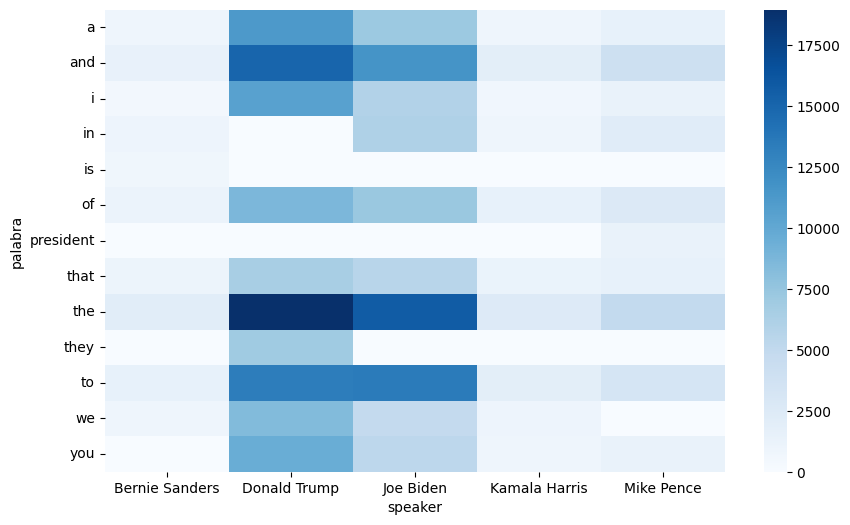

In [ ]:
#HEATMAP DE FRECUENCIA DE PALABRAS (Cruce palabra vs candidato)
# Crear matriz de frecuencia: filas = palabras, columnas = candidatos
df_frecuencia = df_top_palabras.pivot_table(index='palabra', columns='speaker', values='frecuencia', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(df_frecuencia, annot=True, fmt='d', cmap='Blues')
plt.title("Frecuencia de palabras por candidato")
plt.xlabel("Candidato")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()


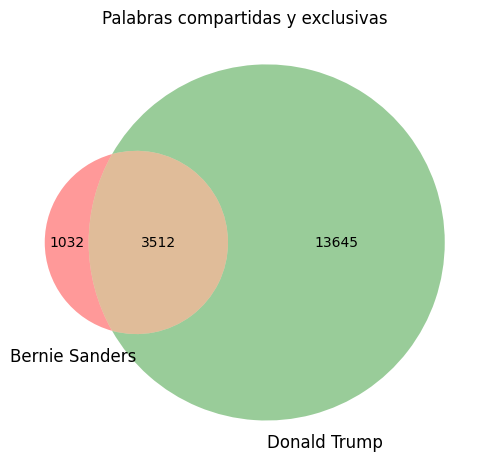

In [ ]:
# DIAGRAMA DE VENN para vr palabras comunes y exclusivas
from matplotlib_venn import venn2

# Ejemplo con dos candidatos
c1, c2 = listas_por_speaker.index[:2]
set1 = set(listas_por_speaker[c1])
set2 = set(listas_por_speaker[c2])

plt.figure(figsize=(6,6))
venn2([set1, set2], set_labels=(c1, c2))
plt.title("Palabras compartidas y exclusivas")
plt.show()


In [ ]:
# TODO: Busque los candidatos/as con mayor cantidad de palabras.


In [ ]:
# TODO: Construya una matriz de 5x5, donde cada fila y columna corresponden a un candiato/a,
# y la entrada (i,j) contiene la cantidad de veces que el candiato/a “i” menciona al candiato/a “j”.

# mentions_matrix = ...

# Opcional: Genere un grafo dirigido con esa matriz de adyacencia para visualizar las menciones.
# Puede ser util la biblioteca networkx